# Assignment 3 Due Friday, February 17.

Your code solutions to these problems should be included
in this JupyterLab. Change the name of the worksheet to

lastname_firstname_Assignment3.ipynb

Please submit your solutions by uploading them to Canvas. Do the problems in order since later ones use the earlier ones.

If you have any questions, see me in office hours or e-mail your question, with your .ipynb file as an attachment.

Your solutions should use the function names provided in the problems. In addition to your code for each function, you should include severalapplications of your functions

Also, you might find this link useful. It contains the naming conventions fo Python variables and functions:



## Random Walks

This assignment involves planar random walks on a rectangular lattice. For background, check out:
    
https://en.wikipedia.org/wiki/Random_walk

A random walk on the real line is a discrete time sequence of steps of a "particle" 
o the left or right on the real line. Here, we'll restrict our steps to be of fixed 
ength, which we'll choose to be of length 1. We'll denote the location of the particle 
after $n$ steps by $x_n$, which is an integer. The next step will wind up at either 
1 unit to the right or 1 unit to the left, each with probability 1/2. 
So $x_{n+1} = x_n -1$ or $x_n + 1$ each with probability 1/2. 

Since a random walk is (naturally) random, any mathematical statements we can make 
must be probabilistic or statistical and not deterministic. For instance, if a 
particle is located at $x_n$ after $n$ steps, we can say that after 2 more steps 
it has probability 1/2 of being back at location $x_n$, probability 1/4 of being 
located at $x_n -2$, and probability 1/4 of being located at $x_n + 2$. It has 
probability 0 of being located at any other integer point.

While random walks on the real line are of interest, more interesting questions arise when
studying random walks on the integer lattice in $\mathbb{R}^2$. The integer lattice $L$ consists
of all points in the plane with integer coordinates:

$L = \{(x,y):\ x, y \in \mathbb{Z}\}$

A random walk on $L$ consists of a sequence of ordered pairs of integers:

$[x_0,y_0], \ [x_1, y_1], \ [x_2, y_2], \ldots, [x_n,y_n], [x_{n+1},y_{n+1}], \ldots $

Where $ [x_{n+1},y_{n+1}]$ is obtained from $ [x_n,y_n]$ by taking one step left,
right, up, or down each with probability 1/4. For example, if the particle is located
at $[3,2]$, the next step will move the particle to $[2,2]$, $[4,2]$, $[3,3]$, or $[3,1]$
each with probability 1/4. 

We might ask, for example, if a particle is located at $[3,2]$, what is the probabilty
that after two steps it will be located at $[4,3]$, one step to the right and one step
up. There are two ways for this to occur out of 16 possible pairs of
steps left, right, up, or down, so the probability is 1/8. 

We'll begin by generating random walks in Python and visualizing them with 
mathplotlib. Then we'll explore the types of probabilistic statements one can
make about them. 





Before proceeding, import the following packages:

In [1]:
import numpy as np
from numpy.linalg import norm
import random

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

%matplotlib inline

## 1 A Random Walk in the Plane

### (a) Random walk function

Code a Python function that creates a random walk on the integer
lattice in the plane 

* with inputs the initial point of the walk and the length (in number of steps) of the walk. Use the names *init_pos* for the initial position and *num_steps* for the number of steps. 

* with output a NumPy array of shape (# steps) x 2 listing the steps of the walk.
Use the name *mywalk* for the output.

Your function 

* should contain a loop to generate the successive points of the walk

* the loop should contain a call to random.randint(1,4) to 
generate a random integer from 1, 2, 3, or 4

* Based on the random number, the loop should assign the next position obtained
by adding $[1,0]$, $[-1,0]$, $[0,1]$ or $[0.-1]$ to the current position

In [2]:
def randomwalk(init_pos, num_steps):
    counter = 0; mywalk = np.zeros((num_steps + 1, 2)); mypoint = np.array(init_pos)
    
    if (len(init_pos) != 2):
        return("ERROR: Initial Position is not a Valid Point in 2-Dimensional Space")
        
    while (counter < num_steps):
        
        ## Update mywalk to include the New Point
        mywalk[counter] = mypoint
        
        counter += 1; random_step = random.randint(1, 4)
        
        ## Iterate on Point
        if (random_step == 1):
            mypoint += [1, 0]
        elif (random_step == 2):
            mypoint += [-1, 0]
        elif (random_step == 3):
            mypoint += [0, 1]
        elif (random_step == 4):
            mypoint += [0, -1]
        
    return(mywalk)

In [3]:
mywalk = randomwalk([0,0], 30)

### (b) Plotting your random walk

Here are two methods of plotting your random walk. 

* The first plots all the steps of the walk showing line segments of length 1 for each step.

* The second animates the walk by iteratively plotting points of a scatter
plot. Points that are hit multiple times become darker.

Here is the first method. This works for large values of *num_steps*. Try this several
times for *num_steps* = 10, 100, 1000, 10000, 100000, and 1000000. The point is to
get an intuitive visual sense of random walks.

Note the grid is turned off and the figure is not saved, since no particular walk is of
more interest than any other.

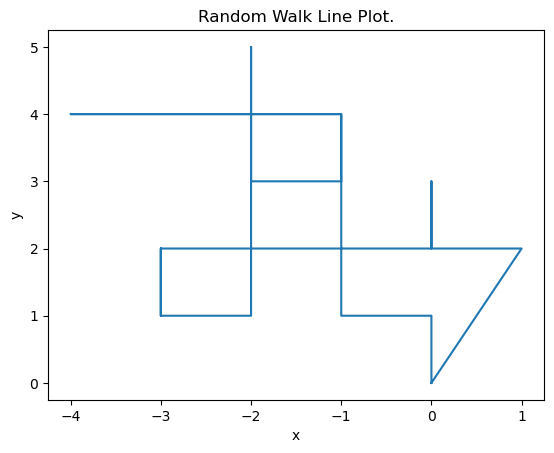

In [4]:
# Line plot of a random walk 

fig, ax = plt.subplots()
ax.plot(mywalk[:,0], mywalk[:,1])

ax.set(xlabel='x', ylabel='y',
       title='Random Walk Line Plot.')

# ax.grid()
# fig.savefig("test.png")

plt.show()

Here is the animated scatter plot. This will churn if you plot too many points. 
Limit your plotting here to 200 points.

In [5]:
# ANIMATED RANDOM WALK

import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

x = mywalk[:,0]
y = mywalk[:,1]

%matplotlib tk     

fig, ax = plt.subplots()

# sc = ax.scatter(x,y[0])
plt.ylim(-40,40)
plt.xlim(-40,40)

def animate(i): 
    area = 30
    colors = [1]
    plt.scatter(x[i], y[i], s=area, c=colors, alpha=0.5)

ani = matplotlib.animation.FuncAnimation(fig, animate, 
                frames=len(y), interval=300, repeat=True) 

plt.show()

## 2 Expected values

Since a random walk is a stochastic process, i.e. it is a family
of random variables, any single walk, will yield different values
for functions of walks. The best we can do in this case is to 
calculate the value of interest over a large collection of walks
and calculate the mean and variance (or standard deviation)
of the outcome. The mean will be the *expected value* for
whatever value we are calculating. Here is one such example.

First, assume that the initial location is $[0,0]$. Let $R > 0$ be
the radius of a disk centered at the origin. For any random 
walk we can find the first time it leaves the disk. That is, the
first time $t$ (which is an integer) for which 

$\parallel [x_t,y_t] \parallel > R$

This time $t$ is easy to calculate. We don't care what happens
after time $t_R$; the walk can re-enter the disk or not, so we can
end a walk once $t_R$ is reached and record $t_R$.

Repeating this process a large number of times, $N = 100$ is a reasonable
place to start, we can estimate a value for this random variable by
computing the mean of $t_R$ over $N$, and we can estimate how
good this estimate is by calculating the standard deviation of the computed
$t_R$. 

In this problem we'll compute the expected value $t_R$ and analyze
its variability. 

(a) Using your function from problem 1 as a starting point modify your
function to produce a function 

* whose input is an initial point (which we will set to $[0,0]$), a number of 
iterations, and a radius $R > 1$.

* and whose output is the first time $t_R$ (an integer) when $\parallel [x_t,y_t] \parallel > R$

Test this function on several random walks. Notice that in practice we will want to choose a large value for the number of iterations so that it is very likely
that $t_R$ will be reached.

In [6]:
def randomwalk_lengthR(init_pos, num_steps, radius):
    counter = 0; mywalk = np.zeros((num_steps + 1, 2)); mypoint = np.array(init_pos)
    
    if (len(init_pos) != 2):
        return("ERROR: Initial Position is not a Valid Point in 2-Dimensional Space")
        
    while (counter < num_steps):
        
        ## Update mywalk to include the New Point
        mywalk[counter] = mypoint
        
        counter += 1; random_step = random.randint(1, 4)
        
        ## Iterate on Point
        if (random_step == 1):
            mypoint += [1, 0]
        elif (random_step == 2):
            mypoint += [-1, 0]
        elif (random_step == 3):
            mypoint += [0, 1]
        elif (random_step == 4):
            mypoint += [0, -1]
            
        if (mypoint[0]^2 + mypoint[1]^2 > radius^2):
            return(counter)
        
    return(None)

In [7]:
mywalk = randomwalk_lengthR([0,0], 100, 10)
mywalk

45

(b) Create a second function that calls the function from part (a) and computes
$t_R$ for a specified number of random walks and stores the values of $t_R$
in a NumPy array. The function should

* have as its input the $N$ of walks to be run, the maximum number of iterations of each walk, and the radius $R$

* have as its output a NumPy array of length $N$ containing the computed
values of $t_R$

In [8]:
def randomwalk_lengthR_Generator(iterations, init_pos, num_steps, radius):
    time_to_complete = np.zeros(iterations)
    for i in range(iterations):
        steps = randomwalk_lengthR(init_pos, num_steps, radius)
        time_to_complete[i] = steps
        
    return(time_to_complete)

(c) Apply your function from (b) with $R = 10, 20, 30, 40,$ and $50$ for $N=100$.
This will produce 5 NumPy arrays. Save each of these arrays. The mean
of the arrays of $t_R$ in each case will be our estimate of the expected
value of $t_R$, which we denote by $\overline{E[t_R]}$.  Do you detect any relationship between the estimator and $R$? Explain.

In [9]:
meanarr = np.zeros(5)

radius10 = randomwalk_lengthR_Generator(100, [0, 0], 1000000, 10)
meanarr[0] = radius10.mean()

radius20 = randomwalk_lengthR_Generator(100, [0, 0], 1000000, 20)
meanarr[1] = radius20.mean()

radius30 = randomwalk_lengthR_Generator(100, [0, 0], 1000000, 30)
meanarr[2] = radius30.mean()

radius40 = randomwalk_lengthR_Generator(100, [0, 0], 1000000, 40)
meanarr[3] = radius40.mean()

radius50 = randomwalk_lengthR_Generator(100, [0, 0], 1000000, 50)
meanarr[4] = radius50.mean()

meanarr

array([ 134.25,  840.79, 2388.36, 2982.09, 7000.39])

As the radius increases, the average number of steps taken to reach a point that is outside the circle of radius R increases. This relationship is proportional, however, not directly proportional. (i.e. Average number of steps for R = 50 is significantly greater than 5x the average number of steps for R = 10)

(d) For each of your five arrays of $t_R$ values in part (c), plot the histogram.
Does it appear the values are normally distributed, i.e. follow a bell shaped
curve, or not? Explain your answer. (See Chapter 4B for histogram plots.)

In [10]:
import matplotlib.pyplot as plt

In [11]:
n, bins, patches = plt.hist(x=radius10, bins='auto', color='green',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of Steps')
plt.ylabel('Frequency')
plt.title('Walks of Radius 10')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

plt.show()

In [12]:
n, bins, patches = plt.hist(x=radius20, bins='auto', color='blue',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of Steps')
plt.ylabel('Frequency')
plt.title('Walks of Radius 20')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

plt.show()

In [13]:
n, bins, patches = plt.hist(x=radius30, bins='auto', color='yellow',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of Steps')
plt.ylabel('Frequency')
plt.title('Walks of Radius 30')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

plt.show()

In [14]:
n, bins, patches = plt.hist(x=radius40, bins='auto', color='red',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of Steps')
plt.ylabel('Frequency')
plt.title('Walks of Radius 40')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

plt.show()

In [15]:
n, bins, patches = plt.hist(x=radius50, bins='auto', color='black',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of Steps')
plt.ylabel('Frequency')
plt.title('Walks of Radius 50')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

plt.show()

For all of these plots, the data is heavily skewed right, even after ignoring outliers. Much of the data for all histograms is concentrated on the left-hand side of the histogram, implying this heavy skew.

## 3 Random Walks on Graphs

As you saw in problem 1, a random walk on the integer lattice in the
plane can roam widely and spend time in various parts of the plane. An 
interesting problem is to understand what happens when a walk
is confined to a bounded (or finite) subset of the integer lattice $L$.
We explore this in the following. First, the probability. 

Let $G$ denote a connected subset of $L$. $G$ should consist of a
finite set of lattice points $V$  and a collection of edges $E$
connecting them. 

* The endpoints of edges in $E$ must be vertices
in $V$

* every vertex in $V$ must be the endpoint of one or more
edges in $E$, and 

*every pair of vertices can be connected by walking
along a subset of the edges in $E$. 

Given a random walk starting
at a point $p \in V$, we ask how long the walk is expected to take
before reaching a second point $q \in V$ for the first time. This value
is called the *hitting time* $H(p,q)$ of the walk. The hitting time is 
a random variable, so we can compute an estimate of its expected value $\overline{E(H(p,q))}$.

Before we can conduct any experiments, we'll need to construct a finite graph.

### (a) A Small Finite Graph in Dictionary Format

Construct a graph $G = (V,E)$ of approximately 20 vertices by hand
with the following properties (encoding in Python comes next):

* It contains the vertice $[0,0]$ and $[1,0]$ and the edge connecting
them. 

* The other vertices  are spread around this edge, some with $x$-coordinate
greater than or equal to 1 and others with $x$-coordinate less than or equal
to zero

* There should be between 25 and 30 edges but no edge other than
the first edge should connect points $[0,y]$ and $[1,y]$.  

This will produce a graph consisting of two connected ``islands'' connected
by a single bridge. 

Store you graph in a dictionary as follows:

* There is one key for each vertex, and the key is a string. For example,
'[0, 0]' and '[1, 0]' should be keys.

* The value for each key should be a list of the vertices it connects
to. For example, if [0,0] also connects to [-1,0] and [0,1], the value that goes
with key =  '[0, 0]' should be [[1,0],[-1, 0], [0, 1]]

* Create the dictionary by first creating two lists. For keys it is a list of
strings. For values it is a list of lists of adjacent vertices. Use the zip construction to
produce the dictionary.

In [16]:
vertex_list = ['[0, 0]', '[-1, 0]', '[-2, 0]', '[-2, 1]', '[-1, 1]', '[-1, -1]', '[-2, -1]', '[-3, -1]', '[-3, 0]', 
               '[-4, 0]', '[1, 0]', '[2, 0]', '[2, 1]', '[1, 1]', '[1, -1]', '[2, -1]', '[3, -1]', '[3, 0]', '[4, 0]', 
               '[5, 0]']
edge_list = [[[-1, 0], [1, 0]], [[0, 0], [-1, 1], [-1, -1], [-2, 0]], [[-1, 0], [-2, 1], [-2, -1], [-3, 0]], 
             [[-2, 0], [-1, 1]], [[-2, 1], [-1, 0]], [[-1, 0], [-2, -1]], [[-1, -1], [-2, 0], [-3, -1]], 
             [[-3, 0], [-2, -1]], [[-2, 0], [-4, 0], [-3, -1]], [[-3, 0]],
             [[0, 0], [1, 1], [1, -1], [2, 0]], [[1, 0], [3, 0], [2, 1], [2, -1]], [[1, 1], [2, 0]], [[1, 0], [2, 1]], 
             [[1, 0], [2, -1]], [[1, -1], [2, 0], [3, -1]], [[2, -1], [3, 0]], [[2, 0], [4, 0], [3, -1]], [[3, 0], [5,0]],
             [[4, 0]]]

graph_dict = dict(zip(vertex_list, edge_list))
graph_dict

{'[0, 0]': [[-1, 0], [1, 0]],
 '[-1, 0]': [[0, 0], [-1, 1], [-1, -1], [-2, 0]],
 '[-2, 0]': [[-1, 0], [-2, 1], [-2, -1], [-3, 0]],
 '[-2, 1]': [[-2, 0], [-1, 1]],
 '[-1, 1]': [[-2, 1], [-1, 0]],
 '[-1, -1]': [[-1, 0], [-2, -1]],
 '[-2, -1]': [[-1, -1], [-2, 0], [-3, -1]],
 '[-3, -1]': [[-3, 0], [-2, -1]],
 '[-3, 0]': [[-2, 0], [-4, 0], [-3, -1]],
 '[-4, 0]': [[-3, 0]],
 '[1, 0]': [[0, 0], [1, 1], [1, -1], [2, 0]],
 '[2, 0]': [[1, 0], [3, 0], [2, 1], [2, -1]],
 '[2, 1]': [[1, 1], [2, 0]],
 '[1, 1]': [[1, 0], [2, 1]],
 '[1, -1]': [[1, 0], [2, -1]],
 '[2, -1]': [[1, -1], [2, 0], [3, -1]],
 '[3, -1]': [[2, -1], [3, 0]],
 '[3, 0]': [[2, 0], [4, 0], [3, -1]],
 '[4, 0]': [[3, 0], [5, 0]],
 '[5, 0]': [[4, 0]]}

### (b) A Random Walk on a Finite Graph

Modify your function from 1 (a) to generate a walk on your graph. There are
several differences to take into account:

* Vertices will no longer be attached to exactly four other edges.

* Vertices will be connected to *d* other vertices where *d* is the length
of the value associated to the vertex. 

For example, in the above, suppose
the dictionary is called graph_dict and mywalk[k] is the kth vertex of the
walk, then 

    newpoints = graph_dict.get(str(mywalk[k]))

is the list of points attached to the point mywalk[k]. 

The next point is chosen randomly from these, but the choice will
be only among len(newpoints) points. Then the nextpoint will be

    nextpoint = newpoints[random.randint(0,len(newpoints)-1)]

And we can add it to the list with

    mywalk.append(newpoint)

Embedding this in your code will produce a random walk of the specified length
on your graph.

In [17]:
def randomwalk_Graph(graph, init_pos, num_steps):
    counter = 0; mywalk = [init_pos]
    
    if (len(init_pos) != 2):
        return("ERROR: Initial Position is not a Valid Point in 2-Dimensional Space")
        
    while (counter < num_steps):
        
        ## Update mywalk to include the New Point
        newpoints = graph_dict[str(mywalk[counter])]

        nextpoint = newpoints[random.randint(0, len(newpoints) - 1)]

        mywalk.append(nextpoint)
        
        counter += 1
        
    return(mywalk)

In [18]:
randomwalk_Graph(graph_dict, [0, 0], 10)

[[0, 0],
 [1, 0],
 [2, 0],
 [2, 1],
 [2, 0],
 [2, -1],
 [2, 0],
 [1, 0],
 [1, -1],
 [1, 0],
 [1, -1]]

### (c) Incorporating Hitting Time

Modify your function so that in addition to the starting point, called p above,
it is given as input the endpoint q, and it records the time it takes to 
get from p to q. Notice p can equal q.

In [19]:
def randomwalk_Target(graph, init_pos, target_pos, num_steps):
    counter = 0; mywalk = [init_pos]
    
    while (counter < num_steps):
        
        if (mywalk[counter] == target_pos):
            print("Target Position reached after", counter, "iterations")
            return(counter)
        
        ## Update to find the Next Point in the Walk
        newpoints = graph_dict[str(mywalk[counter])]

        nextpoint = newpoints[random.randint(0, len(newpoints) - 1)]

        mywalk.append(nextpoint)
        
        counter += 1
        
    print("Target Position not reached. Try to increases the number of steps.")

In [20]:
randomwalk_Target(graph_dict, [0, 0], [4, 0], 1000)

Target Position reached after 116 iterations


116

In [21]:
randomwalk_Target(graph_dict, [0, 0], [0, 0], 1000)

Target Position reached after 0 iterations


0

### (d) Estimates of Expected Values for Hitting Times

Similar to problem 2, 

* select five pairs of points from different parts of 
your graph

* calculate the hitting time for 100 random walks starting at the
first of point of each pair and hitting the second point of the
pair

* compute the mean hitting time for each pair

Can you draw any conclusions about hitting time from these different
hitting time estimates? Explain.

In [22]:
## Redefine Function to Remove Print Statements

def randomwalk_Target(graph, init_pos, target_pos, num_steps):
    counter = 0; mywalk = [init_pos]
    
    while (counter < num_steps):
        
        if (mywalk[counter] == target_pos):
            return(counter)
        
        ## Update to find the Next Point in the Walk
        newpoints = graph_dict[str(mywalk[counter])]

        nextpoint = newpoints[random.randint(0, len(newpoints) - 1)]

        mywalk.append(nextpoint)
        
        counter += 1
        
    return(None)

In [23]:
pair1 = np.zeros(100); pair2 = np.zeros(100); pair3 = np.zeros(100); pair4 = np.zeros(100); pair5 = np.zeros(100);

for i in range(100):
    pair1[i] = randomwalk_Target(graph_dict, [0, 0], [4, 0], 100000)
    pair2[i] = randomwalk_Target(graph_dict, [-2, -1], [0, 0], 100000)
    pair3[i] = randomwalk_Target(graph_dict, [3, 0], [-4, 0], 100000)
    pair4[i] = randomwalk_Target(graph_dict, [1, 1], [-1, -1], 100000)
    pair5[i] = randomwalk_Target(graph_dict, [-4, 0], [5, 0], 100000)

meanarr = np.zeros(5)
meanarr[0] = pair1.mean(); meanarr[1] = pair2.mean(); meanarr[2] = pair3.mean() 
meanarr[3] = pair4.mean(); meanarr[4] = pair5.mean();

meanarr

array([130.06,  33.54, 188.62,  92.44, 204.66])

Due to the construction of the graph, it is hard to infer any true relationship of average hitting time between two points. This is because not every point has 4 possible points to go to, unlike in a traditional cartesian plane. However, a rough trend is showing that as the distance between points increases, the average hitting time also increases. Much of this relationship can likely be attributed to the random nature of the sequential point generation. 